In [1]:
!pip install pandas numpy scikit-learn reportlab joblib matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.0 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from datetime import datetime
import os


In [3]:
# Step 1: Create synthetic dataset
np.random.seed(42)
n = 1000

df = pd.DataFrame({
    "family_size": np.random.randint(1, 8, n),
    "land_area": np.random.randint(800, 5000, n),
    "budget_lakhs": np.random.randint(20, 200, n),
    "bedrooms": np.random.randint(1, 6, n),
    "bathrooms": np.random.randint(1, 5, n)
})

def get_plan(row):
    if row.budget_lakhs < 40:
        return "1BHK Apartment"
    elif row.budget_lakhs < 80:
        return "2BHK Apartment"
    elif row.budget_lakhs < 120:
        return "3BHK Duplex"
    elif row.budget_lakhs < 160:
        return "4BHK Duplex"
    else:
        return "Luxury Villa"

df["house_type"] = df.apply(get_plan, axis=1)
df.head()


,family_size,land_area,budget_lakhs,bedrooms,bathrooms,house_type
0,7,3977,89,1,1,3BHK Duplex
1,4,2928,65,3,3,2BHK Apartment
2,5,2980,127,3,2,4BHK Duplex
3,7,937,142,3,1,4BHK Duplex
4,3,4272,190,2,1,Luxury Villa


In [4]:
# Step 2: Train model
X = df[["family_size", "land_area", "budget_lakhs", "bedrooms", "bathrooms"]]
y = df["house_type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(n_estimators=150, random_state=42))
])

model.fit(X_train, y_train)

print("✅ Training Accuracy:", model.score(X_train, y_train))
print("✅ Test Accuracy:", model.score(X_test, y_test))

# Save model
joblib.dump(model, "house_model.pkl")


✅ Training Accuracy: 1.0
✅ Test Accuracy: 0.985


['house_model.pkl']

In [5]:
# Step 3: Make prediction based on user input
family_size = int(input("Enter family size: "))
land_area = int(input("Enter land area (sq.ft): "))
budget_lakhs = int(input("Enter budget (in lakhs ₹): "))
bedrooms = int(input("Enter bedrooms: "))
bathrooms = int(input("Enter bathrooms: "))

features = [[family_size, land_area, budget_lakhs, bedrooms, bathrooms]]
prediction = model.predict(features)[0]

print(f"\n🏠 Recommended House Type: {prediction}")


Enter family size:  5
Enter land area (sq.ft):  2400
Enter budget (in lakhs ₹):  130
Enter bedrooms:  4
Enter bathrooms:  3



🏠 Recommended House Type: 4BHK Duplex


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
# Step 4: Generate PDF report
os.makedirs("output", exist_ok=True)
pdf_path = f"output/HousePlan_{datetime.now().strftime('%Y%m%d_%H%M%S')}.pdf"

c = canvas.Canvas(pdf_path, pagesize=letter)
c.setFont("Helvetica-Bold", 18)
c.drawString(200, 750, "🏠 AI Dream House Planner Report 🏠")

c.setFont("Helvetica", 12)
y = 700
c.drawString(60, y, f"Family Size: {family_size}")
c.drawString(60, y - 20, f"Land Area: {land_area} sq.ft")
c.drawString(60, y - 40, f"Budget: ₹ {budget_lakhs} Lakhs")
c.drawString(60, y - 60, f"Bedrooms: {bedrooms}")
c.drawString(60, y - 80, f"Bathrooms: {bathrooms}")

c.setFont("Helvetica-Bold", 14)
c.drawString(60, y - 120, f"🏗️ Recommended Plan: {prediction}")

notes = {
    "1BHK Apartment": "Compact and affordable layout for small families.",
    "2BHK Apartment": "Balanced home with comfort and affordability.",
    "3BHK Duplex": "Spacious design for medium families with kids.",
    "4BHK Duplex": "Large duplex for joint families with multiple rooms.",
    "Luxury Villa": "Premium design with garden, garage, and private terrace."
}

c.setFont("Helvetica", 12)
c.drawString(60, y - 150, f"📋 Layout Details: {notes[prediction]}")

c.setFont("Helvetica-Oblique", 10)
c.drawString(60, 50, f"Generated on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
c.save()

print(f"📄 PDF report generated: {pdf_path}")


📄 PDF report generated: output/HousePlan_20251109_191206.pdf


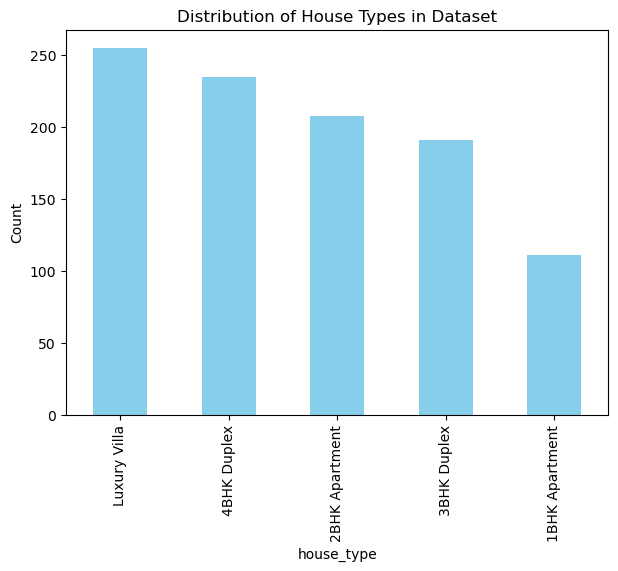

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
df["house_type"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution of House Types in Dataset")
plt.ylabel("Count")
plt.show()
